# (20) fig: rate-distort

**Motivation**: <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
device_idx = 3
device = f'cuda:{device_idx}'

In [3]:
fig_dir = pjoin(fig_base_dir, 'iterative')
os.makedirs(fig_dir, exist_ok=True)
print(os.listdir(fig_dir))

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 600,
}

[]

## Load models

In [4]:
from analysis.final import analyze_fits

model_name = 'poisson_uniform_c(-4)_vH16_t-5_z-[512]_fp_nrm-none_<lin|lin>'
fits = [
    'beta=0.5_mc_b1000-ep1000-lr(0.002)_beta(0.5:0x0.5)_temp(0.1:lin-0.5)_gr(500)_(2024_08_19,09:19)',
    'beta=1.0_mc_b1000-ep1000-lr(0.002)_beta(1:0x0.5)_temp(0.1:lin-0.5)_gr(500)_(2024_08_19,09:17)',
    'beta=2_mc_b1000-ep1000-lr(0.002)_beta(2:0x0.5)_temp(0.1:lin-0.5)_gr(500)_(2024_08_19,09:21)',
    'beta=6_mc_b1000-ep1000-lr(0.002)_beta(6:0x0.5)_temp(0.1:lin-0.5)_gr(500)_(2024_08_19,09:22)',
]
fits = [pjoin(model_name, f) for f in fits]

In [5]:
model_name = 'poisson_uniform_c(-4)_vH16_t-20_z-[512]_fp_<lin|lin>'
fits = [
    'beta=40_mc_b1000-ep1000-lr(0.002)_beta(40:0x0.5)_temp(0.05:lin-0.5)_gr(500)_(2024_08_19,22:54)',
    'beta=80_mc_b1000-ep1000-lr(0.002)_beta(80:0x0.5)_temp(0.05:lin-0.5)_gr(500)_(2024_08_19,22:57)',
]
fits = [pjoin(model_name, f) for f in fits]

In [6]:
model_name = 'poisson_uniform_c(-4)_vH16_t-40_z-[512]_fp_<lin|lin>'
fits = [
    'beta=1.6e+02_mc_b500-ep600-lr(0.002)_beta(1.6e+02:0x0.5)_temp(0.05:lin-0.5)_gr(500)_(2024_08_20,07:40)',
    'beta=2e+02_mc_b500-ep600-lr(0.002)_beta(2e+02:0x0.5)_temp(0.05:lin-0.5)_gr(500)_(2024_08_20,08:06)',
    'beta=4e+02_mc_b500-ep600-lr(0.002)_beta(4e+02:0x0.5)_temp(0.05:lin-0.5)_gr(500)_(2024_08_20,22:16)',
]
fits = [pjoin(model_name, f) for f in fits]

In [7]:
tr, meta = load_quick(fits[-1], lite=False, device=device)

In [8]:
%%time

results = tr.analysis(verbose=True)

100%|█████████████████████████████████| 52/52 [01:54<00:00,  2.21s/it]


CPU times: user 1min 39s, sys: 35.3 s, total: 2min 15s
Wall time: 2min 15s


In [9]:
list(results)

['kl',
 'recon',
 'lifetime',
 'population',
 'log_dr_norm',
 'lambda_final',
 'z_final']

In [10]:
print({
    k: v[-1] for k, v
    in results.items()
    if 'final' not in k
})

{
    'kl': 0.07595438,
    'recon': 79.71445,
    'lifetime': 0.9179236888885498,
    'population': 0.9174513220787048,
    'log_dr_norm': 0.5156356
}

In [14]:
### was 4000

{
    'kl': 0.077720925,
    'recon': 79.50092,
    'lifetime': 0.9199033975601196,
    'population': 0.9196191430091858,
    'log_dr_norm': 0.5154135
}

<Axes: ylabel='Count'>

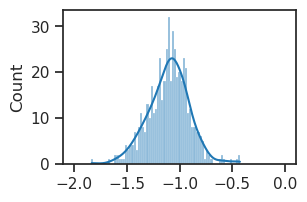

In [11]:
x2p = np.log(results['lambda_final'].mean(0))
sns.histplot(x2p, bins=np.linspace(-2, 0, 100), kde=True)

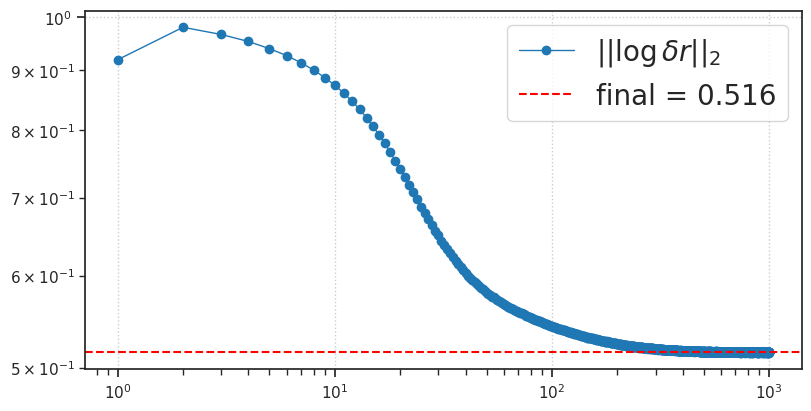

In [21]:
fig, ax = create_figure(1, 1, (8, 4))
ax.plot(range(1, 1 + len(results['log_dr_norm'])), results['log_dr_norm'], lw=1, marker='o', label=r'$||\log \delta r||_2$')
last = results['log_dr_norm'][-1]
ax.axhline(last, color='r', ls='--', label=f"final = {last:0.3f}")
ax.set(xscale='log', yscale='log')
ax.legend(fontsize=20)
ax.grid()
plt.show()

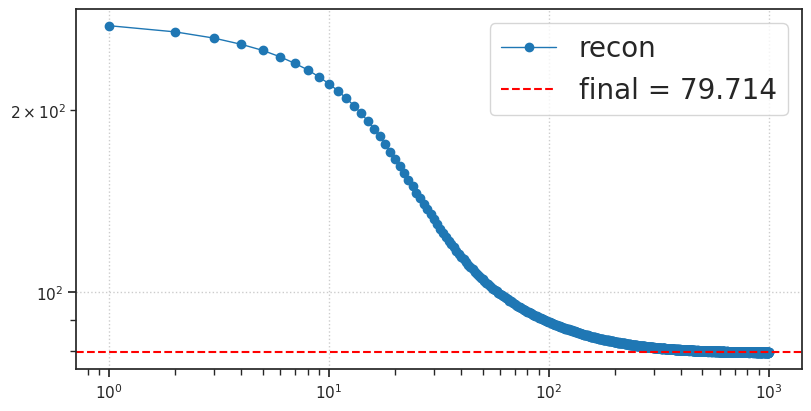

In [23]:
fig, ax = create_figure(1, 1, (8, 4))
ax.plot(range(1, 1 + len(results['recon'])), results['recon'], lw=1, marker='o', label='recon')
last = results['recon'][-1]
ax.axhline(last, color='r', ls='--', label=f"final = {last:0.3f}")
ax.set(xscale='log', yscale='log')
ax.legend(fontsize=20)
ax.grid()
plt.show()

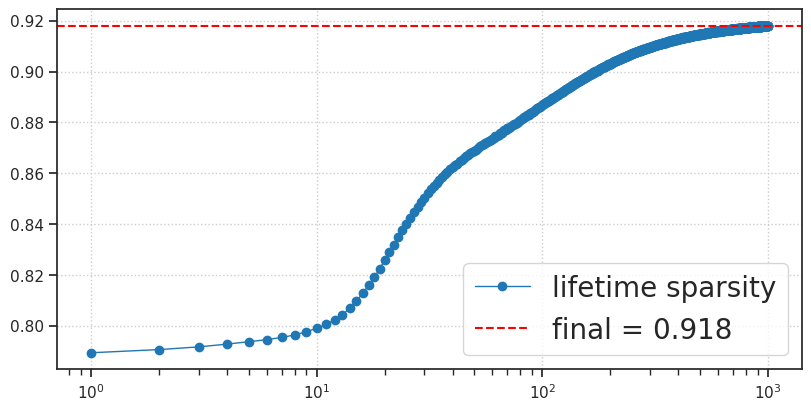

In [24]:
fig, ax = create_figure(1, 1, (8, 4))
ax.plot(range(1, 1 + len(results['lifetime'])), results['lifetime'], lw=1, marker='o', label='lifetime sparsity')
last = results['lifetime'][-1]
ax.axhline(last, color='r', ls='--', label=f"final = {last:0.3f}")
ax.set(xscale='log', yscale='linear')
ax.legend(fontsize=20)
ax.grid()
plt.show()

In [25]:
lifetime, population, perceots = sparse_score(results['z_final'], cutoff=0.01)
print(perceots)

{'0': 89.7, '1': 4.4, '2': 2.3, '3': 1.4, '4': 0.8, '5+': 1.4}

In [26]:
log_prior_rate = tr.model.input_layer.log_rate
log_prior_rate = tonp(log_prior_rate.squeeze())

sample_i = 123
sample_state = tonp(tr.model.state[sample_i])
sample_dr = sample_state - log_prior_rate

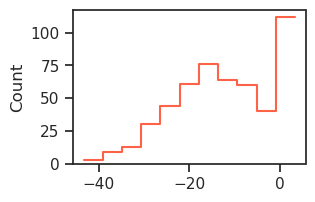

In [27]:
sns.histplot(sample_dr, element='step', fill=False, color='tomato');

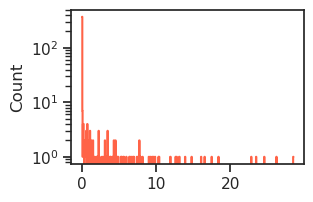

In [28]:
ax = sns.histplot(np.exp(sample_dr), element='step', fill=False, color='tomato')
ax.set(yscale='log');

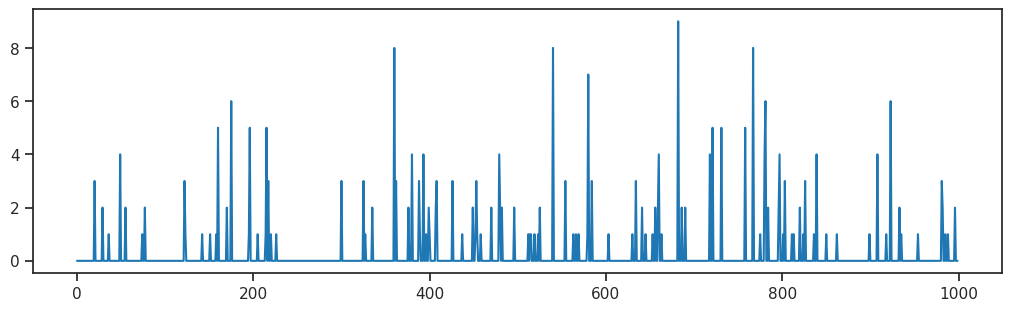

In [29]:
fig, ax = create_figure(1, 1, (10, 3))
ax.plot(results['z_final'][1000:2000, 100])
plt.show()

In [30]:
df = analyze_fits(fits, device, 'main', lite_load=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:30<00:00, 10.29s/it]


In [31]:
df

,checkpoint,timestamp,dataset,type,enc_type,dec_type,seq_len,n_latents,seed,kl_beta,...,time,kl,recon,nelbo,mse_map,temp_anneal,temp_start,temp_stop,hard_fwd,lifetime
0,600,"2024_08_20,07:40",vH16,poisson-b1.6e+02,lin,lin,40,z-[512],0,160.0,...,0,0.434477,274.659576,275.094452,243.220520,lin,1.0,0.05,False,0.518498
1,600,"2024_08_20,07:40",vH16,poisson-b1.6e+02,lin,lin,40,z-[512],0,160.0,...,1,0.469215,262.286499,262.755371,231.137253,lin,1.0,0.05,False,0.520416
2,600,"2024_08_20,07:40",vH16,poisson-b1.6e+02,lin,lin,40,z-[512],0,160.0,...,2,0.449461,250.823486,251.272247,219.613708,lin,1.0,0.05,False,0.523146
3,600,"2024_08_20,07:40",vH16,poisson-b1.6e+02,lin,lin,40,z-[512],0,160.0,...,3,0.433820,239.747437,240.181915,208.541061,lin,1.0,0.05,False,0.526161
4,600,"2024_08_20,07:40",vH16,poisson-b1.6e+02,lin,lin,40,z-[512],0,160.0,...,4,0.421483,228.961716,229.383453,197.836044,lin,1.0,0.05,False,0.529444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,600,"2024_08_20,22:16",vH16,poisson-b4e+02,lin,lin,40,z-[512],0,400.0,...,35,0.069510,122.125877,122.195274,85.579666,lin,1.0,0.05,False,0.861563
116,600,"2024_08_20,22:16",vH16,poisson-b4e+02,lin,lin,40,z-[512],0,400.0,...,36,0.068755,120.555420,120.624084,83.788872,lin,1.0,0.05,False,0.862525
117,600,"2024_08_20,22:16",vH16,poisson-b4e+02,lin,lin,40,z-[512],0,400.0,...,37,0.067962,119.077187,119.144135,82.107506,lin,1.0,0.05,False,0.863665
118,600,"2024_08_20,22:16",vH16,poisson-b4e+02,lin,lin,40,z-[512],0,400.0,...,38,0.067055,117.581062,117.647163,80.527519,lin,1.0,0.05,False,0.864397
